<a href="https://colab.research.google.com/github/MonicaaY/Oasis-Infobyte/blob/main/Weather_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries:
import requests
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from PIL import Image
import io

Enter the city or ZIP code: Brisbane
Weather in Brisbane:
Temperature: 13.04°C
Humidity: 79%
Conditions: clear sky


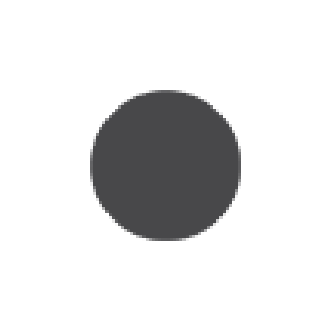

In [ ]:
'''This initializes the WeatherApp class with the OpenWeatherMap API key and sets,
the base URLs for weather data and weather icons'''
class WeatherApp:
    def __init__(self, api_key):
        self.api_key = api_key
        self.base_url = "http://api.openweathermap.org/data/2.5/weather"
        self.icon_base_url = "http://openweathermap.org/img/wn/"

    def get_weather(self, location):
        params = {
            'q': location,
            'appid': self.api_key,
            'units': 'metric'  # Units for temperature (metric for Celsius)
        }
        response = requests.get(self.base_url, params=params)

        if response.status_code == 200:
            data = response.json()
            self.display_weather(data)
        else:
            print("Error fetching weather data.")

    def display_weather(self, data):
    #extracts relevant weather information from the JSON data and prints on the console.
        city = data['name']
        temperature = data['main']['temp']
        humidity = data['main']['humidity']
        weather_description = data['weather'][0]['description']
        icon_id = data['weather'][0]['icon']

        print(f"Weather in {city}:")
        print(f"Temperature: {temperature}°C")
        print(f"Humidity: {humidity}%")
        print(f"Conditions: {weather_description}")

        # Display weather icon
        self.display_icon(icon_id)

    def display_icon(self, icon_id):
        url = f"{self.icon_base_url}{icon_id}@2x.png"
        response = requests.get(url)

        if response.status_code == 200:
            img = Image.open(io.BytesIO(response.content))

            # Display the image using Matplotlib
            plt.figure(figsize=(4, 4))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else:
            print("Error fetching weather icon.")

def main():
  #Here the API key has been established from the Openweathermap website!
    api_key = '16aec25d5b9b8fe79552df67c1ff7bfd'
    weather_app = WeatherApp(api_key)

    location = input("Enter the city or ZIP code: ")
    weather_app.get_weather(location)

if __name__ == "__main__":
    main()
